# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("rym_top5000.csv", thousands = ',')

In [3]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379


In [4]:
df.shape

(5000, 9)

#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [5]:
df2 = df.groupby(["Artist Name"]).agg({'Album':'count', 'Average Rating':'mean'}).reset_index()
df2 = df2[df2.Album > 5]
df2.sort_values("Average Rating", ascending = False, inplace = True)
df2 = df2[["Artist Name", "Average Rating"]].head(10)
df2

,Artist Name,Average Rating
537,David Bowie,4.021250
1844,Radiohead,3.970000
258,Black Sabbath,3.950000
2233,The Beatles,3.946000
1228,King Crimson,3.945714
1293,Led Zeppelin,3.943333
1782,Pink Floyd,3.935000
1124,John Coltrane,3.932857
276,Bob Dylan,3.926364
722,Ennio Morricone,3.920000


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [6]:
df5 = df.groupby(["Artist Name"]).agg(Max = ('Average Rating', np.max), 
                                Min = ('Average Rating', np.min), 
                                Diff = ('Average Rating', lambda x: max(x)-min(x))).sort_values("Diff", ascending = False).head(10).reset_index()
df5

,Artist Name,Max,Min,Diff
0,Kendrick Lamar,4.27,3.52,0.75
1,The Beatles,4.25,3.55,0.70
2,Pink Floyd,4.29,3.60,0.69
3,My Bloody Valentine,4.24,3.58,0.66
4,King Crimson,4.30,3.67,0.63
5,John Coltrane,4.30,3.70,0.60
6,Radiohead,4.23,3.66,0.57
7,Miles Davis,4.23,3.69,0.54
8,The Cure,4.17,3.63,0.54
9,Kanye West,4.07,3.54,0.53


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [7]:
df3 = df.loc[(df["Number of Reviews"]>=15) &(df["Number of Ratings"]>=5000)]
df3 = df3.groupby("Album").agg(NRev = ("Number of Reviews",np.max), NRat = ("Number of Ratings",np.max)).reset_index()

In [8]:
df3["stosunek"] = df3["NRat"]/df3["NRev"]
df3.sort_values('stosunek', ascending = False, inplace = True)
df3.head(10).reset_index(drop=True)

,Album,NRev,NRat,stosunek
0,Jenny Death: The Powers That B Disc 2,30,10855,361.833333
1,Bury Me at Makeout Creek,19,5856,308.210526
2,春と修羅 (Haru to Shura),23,6277,272.913043
3,Saturation,70,17629,251.842857
4,Saturation III,68,17118,251.735294
5,Scenery,24,5968,248.666667
6,Endless,39,8911,228.487179
7,Imperial,50,11271,225.420000
8,Saturation II,85,18322,215.552941
9,Bottomless Pit,102,20614,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [9]:
df['year'] = pd.DatetimeIndex(df['Release Date']).year

In [10]:
df6 = df[df["Number of Reviews"] > df["Number of Reviews"].quantile(0.75)]

In [11]:
df6.groupby(["year"]).agg(LiczbaAlbumowWiecejNizQ3 = ('Number of Reviews', 'count')).reset_index().sort_values("LiczbaAlbumowWiecejNizQ3",ascending = False).head(5)

,year,LiczbaAlbumowWiecejNizQ3
13,1970,43
14,1971,41
12,1969,38
37,1994,36
38,1995,34


In [12]:
df7 = df[df["Number of Ratings"] > df["Number of Ratings"].quantile(0.75)]

In [13]:
df7.groupby(["year"]).agg(LiczbaAlbumowWiecejNizQ3 = ('Number of Ratings', 'count')).reset_index().sort_values("LiczbaAlbumowWiecejNizQ3",ascending = False).head(5)

,year,LiczbaAlbumowWiecejNizQ3
37,1994,41
14,1971,36
13,1970,35
39,1996,34
38,1995,33


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

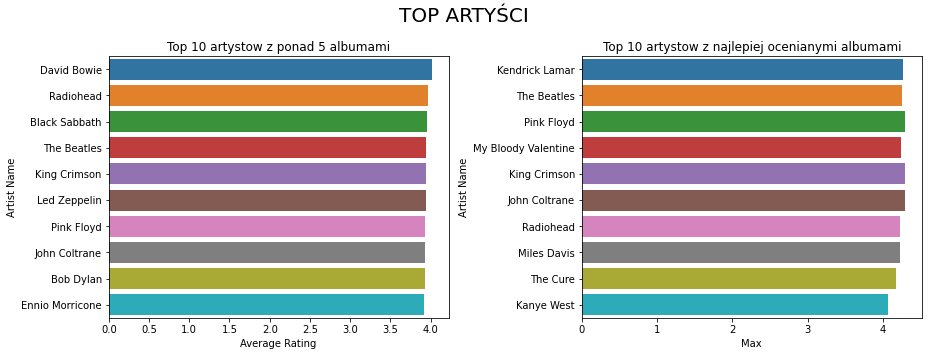

In [15]:
fig,axs = plt.subplots(1,2, figsize = (13,5))
fig.suptitle("TOP ARTYŚCI",fontsize = 20)


sns.barplot(ax = axs[0],data=df2, y = "Artist Name", x ='Average Rating', orient = 'h')
axs[0].title.set_text("Top 10 artystow z ponad 5 albumami")
plt.tight_layout()
sns.barplot(ax = axs[1],data=df5, y = "Artist Name", x ='Max', orient = 'h')
axs[1].title.set_text("Top 10 artystow z najlepiej ocenianymi albumami")
plt.tight_layout()


## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 